# OOS

Mass propellant calculations for the mission consisting of:
1. Disposal of a GEO communication satellite (serviceable satellite) from GEO to Graveyard using a servicer space tug
2. Transfer of a defunct (but functional otherwise) communiction satellite in graveyard orbit back in GEO
3. Providing station keeping and attitude control for this satellite to extend its service life

In [7]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

GEO to Graveyard (disposal of a defunct satellite into graveyard orbit):

In [19]:
mu = 398600.442 # Standard Gravitational Parameter of Earth
r_E = 6378 # Earth radius
z_a = int(input('Enter the radius of initial orbit in km: ')) # 2000 for circular LEO
r_a = r_E + z_a
v_A = math.sqrt(mu / r_a) # Initial orbit constant orbital speed: 
z_b = int(input('Enter the radius of final destination orbit in km: ')) # 35786 for circular GEO
r_b = r_E + z_b
e_2 = (r_b - r_a)/(r_b + r_a) 
h_2 = math.sqrt(r_a * mu * (1 + e_2 * math.cos(0)))
v_Atransf = h_2 / r_a
delta_v_A = v_Atransf - v_A # required forward velocity increment at A: 
v_B_2 = h_2 / r_b # Find the speed at B on transfer orbit
v_B_3 = math.sqrt(mu / r_b) # Destination orbit constant orbital speed
delta_v_B = v_B_3 - v_B_2 # Thus, the delta-v requirement at B to climb from orbit 2 to orbit 3 is
delta_v_total = delta_v_A + delta_v_B
delta_v_total_m_s = round(abs(delta_v_total) * 1000, 2)
delta_v_total_electric = v_A - v_B_3 # Calculatign delta V for transfer using electric propulsion: 
delta_v_total_m_s_electric = round(abs(delta_v_total_electric) * 1000, 2)

Enter the radius of initial orbit in km: 36000
Enter the radius of final destination orbit in km: 36300


In [20]:
print('Total delta-V requirement for the Hohmann transfer between {} km and {} km circular orbits:'.format(z_a, z_b))
print('{} m/s using chemical propulsion system onboard the servicer s/c.'.format(delta_v_total_m_s ))
print('{} m/s using electric propulsion system onboard the servicer s/c.'.format(delta_v_total_m_s_electric ))

Total delta-V requirement for the Hohmann transfer between 36000 km and 36300 km circular orbits:
10.8 m/s using chemical propulsion system onboard the servicer s/c.
10.8 m/s using electric propulsion system onboard the servicer s/c.


In [21]:
mass_satellite = [int(x) for x in input('Enter a range of serviceable satellite masses in kg (e.g. 1 5 10 15): ').split()]

Enter a range of serviceable satellite masses in kg (e.g. 1 5 10 15): 500 1000 1500 2000 2500


In [22]:
mass_servicer = int(input('Enter the servicer satellite mass in kg, excluding propellant: '))

Enter the servicer satellite mass in kg, excluding propellant: 150


In [23]:
Isp_chemical = int(input('Enter the chemical propulsion system specific impulse, Isp, in seconds: '))
Isp_electric = int(input('Enter the electric propulsion system specific impulse, Isp, in seconds: '))

Enter the chemical propulsion system specific impulse, Isp, in seconds: 300
Enter the electric propulsion system specific impulse, Isp, in seconds: 3000


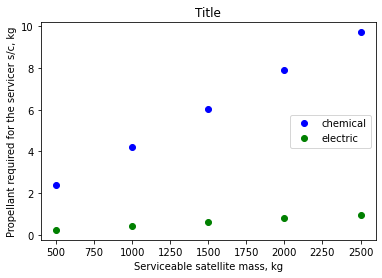


        0        1        2        3        4
0  500.00  1000.00  1500.00  2000.00  2500.00
1    2.38     4.21     6.04     7.88     9.71
2    0.24     0.42     0.61     0.79     0.97


In [24]:
mass_propellant_chemical = []
mass_propellant_electric = []
for i in mass_satellite:
    mass_propellant_chemical.append(round((i + mass_servicer) * (1-math.exp((-(delta_v_total_m_s/1000)/(Isp_chemical * 9.81 * 0.001)))), 2))
    mass_propellant_electric.append(round((i + mass_servicer) * (1-math.exp((-(delta_v_total_m_s_electric/1000)/(Isp_electric * 9.81 * 0.001)))), 2))
table= []
table.append(mass_satellite)
table.append(mass_propellant_chemical)
table.append(mass_propellant_electric)
module_raw= np.array(table)
module= module_raw.reshape(3, -1)
plt.title("Title") 
plt.xlabel("Serviceable satellite mass, kg") 
plt.ylabel("Propellant required for the servicer s/c, kg") 
plt.plot(mass_satellite, mass_propellant_chemical, 'bo', label = 'chemical')
plt.plot(mass_satellite, mass_propellant_electric, 'go', label = 'electric')
plt.legend(loc="center right")
plt.show()
print()
df = DataFrame(module_raw)
print (df)

Second component of the mission (reusability component):

Enter a range of serviceable satellite masses in kg (e.g. 1 5 10 15): 3500 4000 3000

To transfer another satellite back into GEO, from 36300 km to 36000 km, the total requirements will be as such:

delta V:
21.6 m/s using chemical propulsion system onboard the servicer s/c.
21.6 m/s using electric propulsion system onboard the servicer s/c.

Propellant mass req-s:


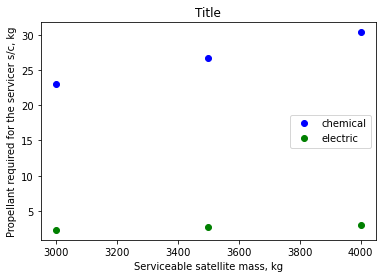


         0        1        2
0  3500.00  4000.00  3000.00
1    26.69    30.35    23.03
2     2.68     3.04     2.31


In [36]:
# Graveard to GEO (carrying a disposed fuel-depleted satellite back to GEO to extend its life)
mass_satellite_2 = [int(x) for x in input('Enter a range of serviceable satellite masses in kg (e.g. 1 5 10 15): ').split()]
print()
print('To transfer another satellite back into GEO, from {} km to {} km, the total requirements will be as such:'.format(z_b, z_a))
print()
print('delta V:')
print('{} m/s using chemical propulsion system onboard the servicer s/c.'.format(delta_v_total_m_s * 2 ))
print('{} m/s using electric propulsion system onboard the servicer s/c.'.format(delta_v_total_m_s_electric * 2))
print()
print('Propellant mass req-s:')
mass_propellant_chemical_2 = []
mass_propellant_electric_2 = []
for i in mass_satellite_2:
    mass_propellant_chemical_2.append(round((i + mass_servicer) * (1-math.exp((-(delta_v_total_m_s * 2 /1000)/(Isp_chemical * 9.81 * 0.001)))), 2))
    mass_propellant_electric_2.append(round((i + mass_servicer) * (1-math.exp((-(delta_v_total_m_s_electric * 2 /1000)/(Isp_electric * 9.81 * 0.001)))), 2))
table= []
table.append(mass_satellite_2)
table.append(mass_propellant_chemical_2)
table.append(mass_propellant_electric_2)
module_raw= np.array(table)
module= module_raw.reshape(3, -1)
plt.title("Title") 
plt.xlabel("Serviceable satellite mass, kg") 
plt.ylabel("Propellant required for the servicer s/c, kg") 
plt.plot(mass_satellite_2, mass_propellant_chemical_2, 'bo', label = 'chemical')
plt.plot(mass_satellite_2, mass_propellant_electric_2, 'go', label = 'electric')
plt.legend(loc="center right")
plt.show()
print()
df = DataFrame(module_raw)
print (df)


To be completed:
Third component of the mission - providing attitude control and station keeping for this satellite to extend its life: